In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Parte 1: Preparación de los datos

In [11]:
balance = pd.read_csv('data//balance.csv').drop('Unnamed: 0',axis=1)
balance



,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [ ]:
etnias = pd.get_dummies(balance['Ethnicity'])
balance["Gender_flag"] = balance.Gender.map( lambda x: 1.0 if x==" Male" else 0.0 ) # 1 si es Male, 0 si es Female
balance["Student_flag"] = balance.Student.map( lambda x: 1.0 if x=="Yes" else 0.0 )
balance["Married_flag"] = balance.Married.map( lambda x: 1.0 if x=="Yes" else 0.0 )

balance_numerics = pd.concat([balance,etnias],axis= 1)


In [27]:



balance_n = balance_numerics[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_flag', 'Student_flag', 'Married_flag','African American', 'Caucasian', 'Asian', 'Balance' ]]
balance_n

,Income,Limit,Rating,Cards,Age,Education,Gender_flag,Student_flag,Married_flag,African American,Caucasian,Asian,Balance
0,14.891,3606,283,2,34,11,1.0,0.0,1.0,0,1,0,333
1,106.025,6645,483,3,82,15,0.0,1.0,1.0,0,0,1,903
2,104.593,7075,514,4,71,11,1.0,0.0,0.0,0,0,1,580
3,148.924,9504,681,3,36,11,0.0,0.0,0.0,0,0,1,964
4,55.882,4897,357,2,68,16,1.0,0.0,1.0,0,1,0,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1.0,0.0,1.0,0,1,0,560
396,13.364,3838,296,5,65,17,1.0,0.0,0.0,1,0,0,480
397,57.872,4171,321,5,67,12,0.0,0.0,1.0,0,1,0,138
398,37.728,2525,192,1,44,13,1.0,0.0,1.0,0,1,0,0


In [ ]:
pd.plotting.scatter_matrix(balance_n,figsize=(20,20), diagonal='kde')

- Income vs Limit parecen tener una correlación positiva, a mayor income, mayor limite (crédito supongo)
- Income vs Rating parece tener una correlacion positiva, al parecer el limite y el rating estan ampliamente ligados, podrian estar midiendo lo mismo. realizar prueba F
- Income vs Tarjetas, tal vez a menores tarjetas mayor income
- a partir de cierta edad se puede obser var mayor income
- El balance parece tener una correlacion positiva con el limit y el raiting
-Parce haber una distribución normal con una varianza muy amplia en los rangos de edad (o una distribucion uniforme en su ddefecto)
- Hay muchisimas mas personas que no son estudiantes, estas parecieran tener mejor balance
- Hay mas personas casadas, las que no lo estan, pareciera que tienen mejor income

In [ ]:
balance_n = balance_n.drop('African American', axis=1)

In [38]:
X = balance_n.iloc[:,:-1]
y = balance_n.iloc[:,len(balance_n.columns)-1:] #Balance col

,Balance
0,333
1,903
2,580
3,964
4,331
...,...
395,560
396,480
397,138
398,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #aleatorizar los datos
                                                   random_state= 1)

In [44]:
lir = LinearRegression().fit(X_train,y_train)
y_hat_lir = lir.predict(X_test)

In [45]:
lir.score(X_test, y_test)

0.9493024023157087

Text(0.5, 1.0, 'True vs Predicted Values')

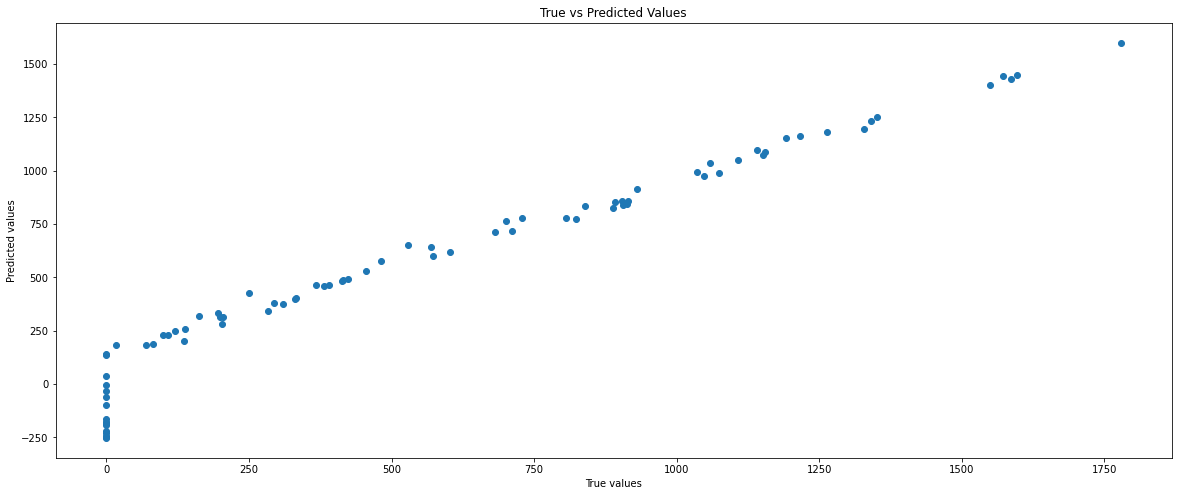

In [53]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(y_test, y_hat_lir)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted values')
ax.set_title('True vs Predicted Values')

array([[<AxesSubplot:title={'center':'Balance'}>]], dtype=object)

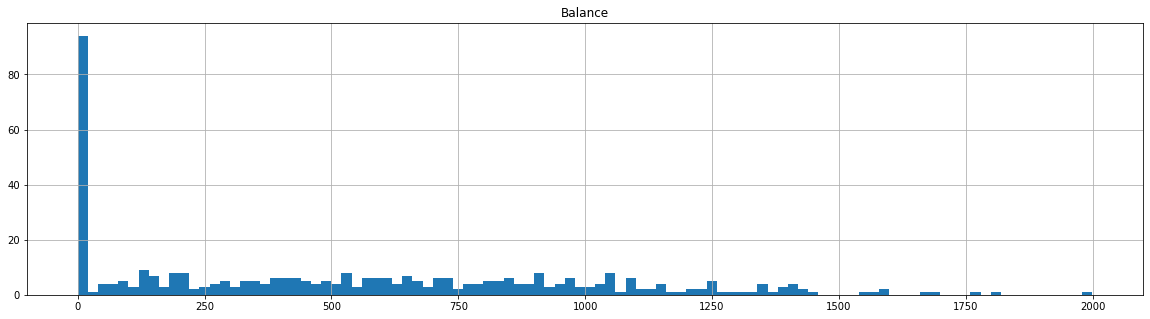

In [55]:
y.hist(bins=100,figsize=(20,5))

In [57]:
balance_Zeros = balance_n
balance_Zeros['is_zero'] = balance_Zeros.Balance.map( lambda x: True if x== 0 else False )

balance_Zeros

,Income,Limit,Rating,Cards,Age,Education,Gender_flag,Student_flag,Married_flag,Caucasian,Asian,Balance,is_zero
0,14.891,3606,283,2,34,11,1.0,0.0,1.0,1,0,333,False
1,106.025,6645,483,3,82,15,0.0,1.0,1.0,0,1,903,False
2,104.593,7075,514,4,71,11,1.0,0.0,0.0,0,1,580,False
3,148.924,9504,681,3,36,11,0.0,0.0,0.0,0,1,964,False
4,55.882,4897,357,2,68,16,1.0,0.0,1.0,1,0,331,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1.0,0.0,1.0,1,0,560,False
396,13.364,3838,296,5,65,17,1.0,0.0,0.0,0,0,480,False
397,57.872,4171,321,5,67,12,0.0,0.0,1.0,1,0,138,False
398,37.728,2525,192,1,44,13,1.0,0.0,1.0,1,0,0,True


In [58]:
X_Z = balance_Zeros.iloc[:,:-1]
y_Z = balance_Zeros.iloc[:, len(balance_Zeros.columns)-1:]

X_train_Z, X_test_Z, y_train_Z, y_test_Z = train_test_split(X_Z,y_Z,
                                                                    train_size=.2,
                                                                    shuffle=True,
                                                                    random_state=1
                                                                    )

In [75]:
knn = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv=10, n_jobs=5, return_train_score= True, verbose=1) #scoring = accuaracy

grid_search = grid.fit(X_Z, y_Z)
print('K óptima:', grid_search.best_params_)
print('Score:', grid.score(X_test_Z,y_test_Z))


Fitting 10 folds for each of 9 candidates, totalling 90 fits
K óptima: {'n_neighbors': 2}
Score: 0.978125


c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [84]:
y_hat_knn = grid.predict(X_Z)
pd.Series(y_hat_knn).value_counts()



False    318
True      82
dtype: int64

In [88]:
select = pd.Series(balance_Zeros['is_zero']).map(lambda x: True if x == False else False)
final_df = balance_Zeros[select].drop('is_zero',axis= 1)
final_df

,Income,Limit,Rating,Cards,Age,Education,Gender_flag,Student_flag,Married_flag,Caucasian,Asian,Balance
0,14.891,3606,283,2,34,11,1.0,0.0,1.0,1,0,333
1,106.025,6645,483,3,82,15,0.0,1.0,1.0,0,1,903
2,104.593,7075,514,4,71,11,1.0,0.0,0.0,0,1,580
3,148.924,9504,681,3,36,11,0.0,0.0,0.0,0,1,964
4,55.882,4897,357,2,68,16,1.0,0.0,1.0,1,0,331
...,...,...,...,...,...,...,...,...,...,...,...,...
394,49.794,5758,410,4,40,8,1.0,0.0,0.0,1,0,734
395,12.096,4100,307,3,32,13,1.0,0.0,1.0,1,0,560
396,13.364,3838,296,5,65,17,1.0,0.0,0.0,0,0,480
397,57.872,4171,321,5,67,12,0.0,0.0,1.0,1,0,138


In [96]:
X_final = final_df.iloc[:,:-1]
y_final = final_df.iloc[:,final_df.shape[1]-1:]

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final,
                                                                                            train_size=0.2,
                                                                                            shuffle=True,
                                                                                            random_state= 1)

lir_f = LinearRegression().fit(X_train_final, y_train_final)
                                                                                         
y_hat_final = lir_f.predict(X_test_final)
lir_f.score(X_test_final,y_test_final)

0.9992560112366085

Text(0.5, 1.0, 'True vs Predicted Values')

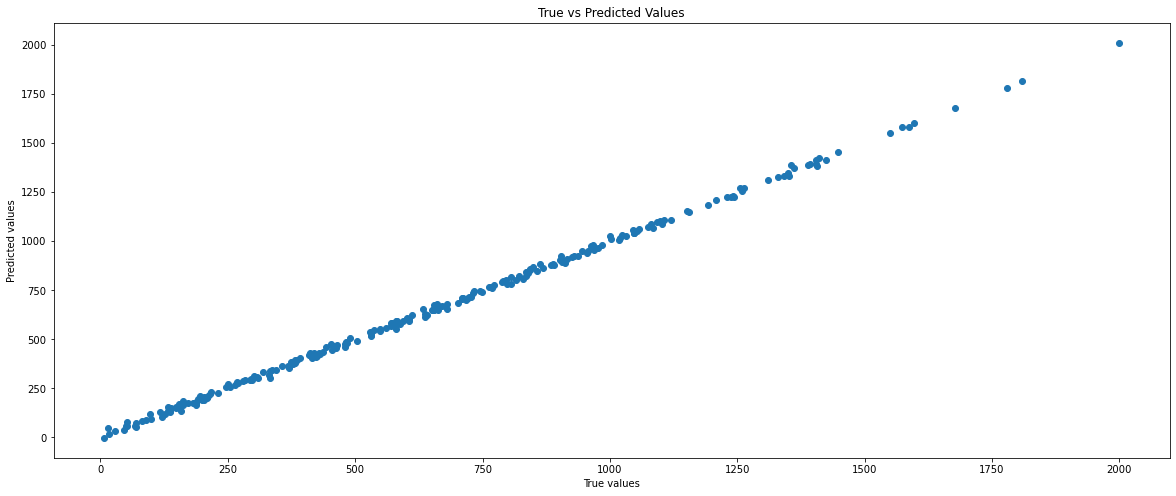

In [97]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(y_test_final, y_hat_final)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted values')
ax.set_title('True vs Predicted Values')

In [ ]:
residuales = y_test_final - y_hat_final


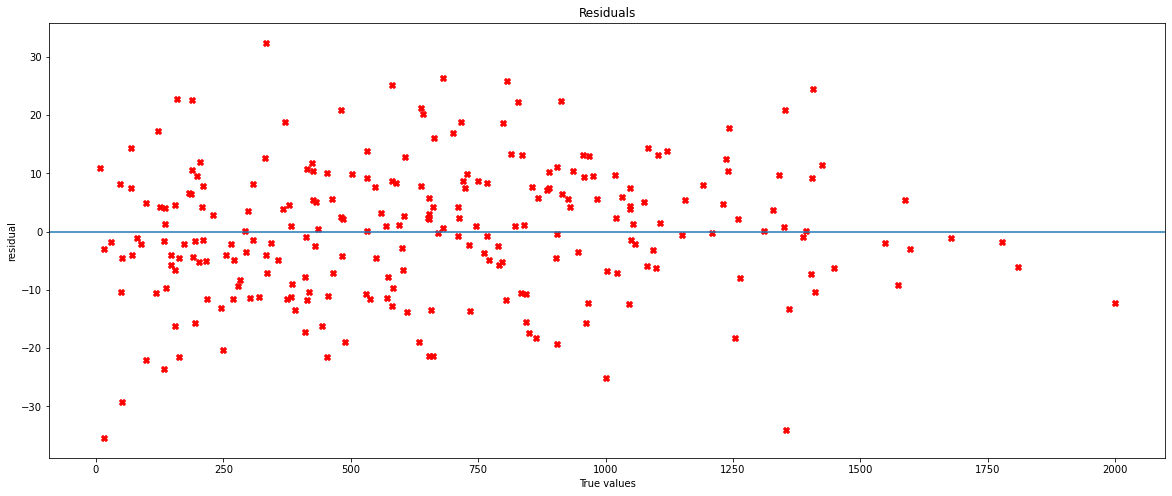

In [108]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(y_test_final, residuales,marker='X', c='r')

ax.set_xlabel('True values')
ax.set_ylabel('residual')
ax.set_title('Residuals')
plt.axhline(y=0, linestyle='-')